In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from collections import Counter
from imblearn.over_sampling import SMOTE


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import cross_val_score

dataFrame = pd.read_csv('ML-EdgeIIoT-dataset.csv')


<ipython-input-10-e7e138bb70de>:25: DtypeWarning: Columns (3,6,11,13,14,16,17,31,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  dataFrame = pd.read_csv('ML-EdgeIIoT-dataset.csv')


In [ ]:
def get_missing(dataFrame):
    dataFrame_types = pd.DataFrame()
    dataFrame_types['data_type'] = dataFrame.dtypes
    dataFrame_types['missing_values'] = dataFrame.isnull().sum()
    return dataFrame_types.sort_values(by='missing_values', ascending=False)

In [ ]:
def precision(actual, predicted):
    # Precision = True pos out of the actual results

    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted == 1)).astype(int))
    return TP/(TP + FP)
def recall(actual, predicted):
    # Recall = True pos out of the predicted results

    TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
    FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 0)).astype(int))
    return TP/(TP + FN)
def f_score(actual , predicted):

    P = precision(actual, predicted)
    R = recall(actual, predicted)
    return 2*P*R/(P + R)

In [ ]:
get_missing(dataFrame)

,data_type,missing_values
tcp.options,object,1
mqtt.conflags,float64,1
tcp.srcport,object,1
udp.port,float64,1
udp.stream,float64,1
...,...,...
tcp.connection.synack,float64,1
tcp.dstport,float64,1
tcp.flags,float64,1
tcp.flags.ack,float64,1


In [ ]:
from sklearn.utils import shuffle
dataFrame.drop_duplicates(inplace=True)
dataFrame = shuffle(dataFrame,random_state=20)

dataFrame.head(10)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
28871,2021 21:40:19.066273000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SQL_injection
24984,2021 21:36:11.359242000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SQL_injection
48070,2021 19:05:52.676121000,221.223.34.159,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DDoS_TCP
12523,2021 00:17:13.364543000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Ransomware
9188,2021 23:37:07.021196000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Ransomware
8170,2021 23:24:50.364465000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Ransomware
62813,2021 20:06:30.491311000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Password
8248,2021 23:25:48.006206000,192.168.0.128,192.168.0.170,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Ransomware
15418,2021 23:11:40.439084000,192.168.0.170,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Uploading
45934,2021 19:03:58.224462000,12.76.74.31,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,DDoS_TCP


In [ ]:
dataFrame.describe(include='object')

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.src.proto_ipv4,http.file_data,http.request.uri.query,http.request.method,http.request.full_uri,http.request.version,tcp.options,tcp.payload,tcp.srcport,Attack_type
count,68697,68696,68696,68696,68696,68696.0,68696.0,68696,68696,68696,68696,68696,68696.0,68696
unique,68298,6017,4247,8,7,462.0,784.0,5,786,5,45137,10403,18498.0,9
top,0.0,192.168.0.170,192.168.0.128,0,0,0.0,0.0,0,0,0,0.0,0,80.0,Ransomware
freq,394,30463,36472,50853,50853,35928.0,35928.0,39112,39112,39512,12274,43269,21790.0,10925


In [ ]:
print(dataFrame['frame.time'].value_counts().head())
print("\nNull Values:")
print(dataFrame['frame.time'].isna().sum())

frame.time
0.0                          394
6.0                            6
 2021 23:12:11.894359000       2
 2021 21:41:52.630389000       1
 2021 23:11:51.407700000       1
Name: count, dtype: int64

Null Values:
0


In [ ]:
value_counts = dataFrame['Attack_label'].value_counts()
print("Attacks: ",value_counts.get(1, 0))
print("Normal: ",value_counts.get(0, 0))
ratio = value_counts.get(1, 0) / value_counts.get(0, 0)
print("\nMalware:Normal ratio is", ratio)

Attacks:  68696
Normal:  0

Malware:Normal ratio is inf


<ipython-input-17-5bad363fcd55>:4: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = value_counts.get(1, 0) / value_counts.get(0, 0)


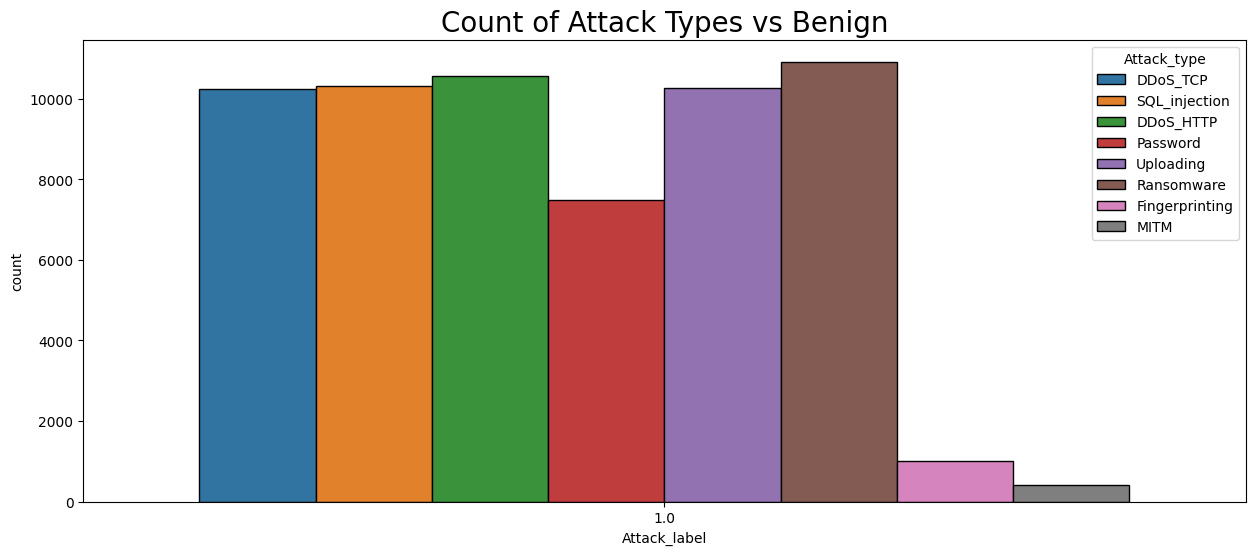

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataFrame, x='Attack_label', hue='Attack_type', edgecolor='black', linewidth=1)
plt.title('Count of Attack Types vs Benign', fontsize=20)
plt.show()

In [ ]:
import plotly.express as px
fig = px.pie(dataFrame, names='Attack_type', title='Distribution of Attack Types')
fig.show()

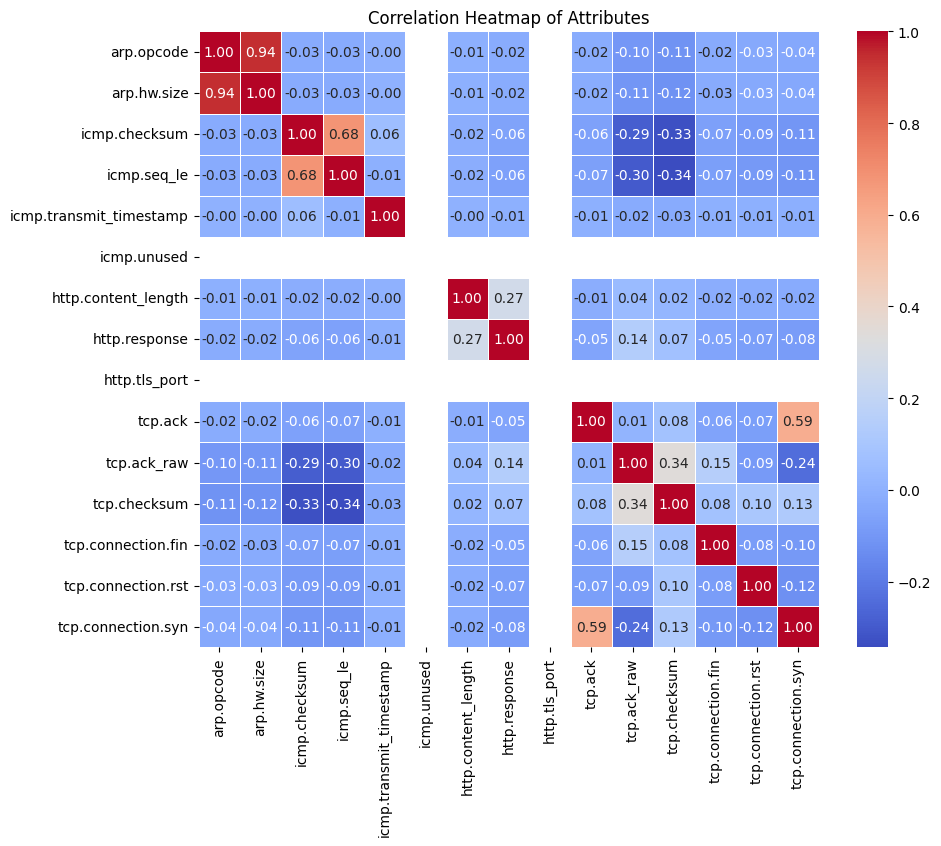

In [ ]:
# Evaluates the relationship between 2 variables in a data set
numeric_cols = dataFrame.select_dtypes(include='number').columns
numeric_data = dataFrame[numeric_cols]
subset = numeric_data[numeric_data.columns[:15]]

# correlation coefficient =
    # 1: a strong relationship,
    # 0 : a neutral relationship,
    # -1 : a not strong relationship
corrMatrix = subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Attributes')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
dataFrame['Attack_label'] = label_encoder.fit_transform(dataFrame['Attack_label'])

# Malware : 1, Benign : 0
dataFrame['Attack_label'].value_counts()

Attack_label
1    132685
0     24301
Name: count, dtype: int64

In [ ]:
numeric_cols = dataFrame.select_dtypes(include='number').columns
X = dataFrame[numeric_cols].drop(['Attack_label'], axis=1)
y_label = dataFrame['Attack_label']
y_type = dataFrame['Attack_type']


X_train, X_test, y_train_label, y_test_label = train_test_split(X, y_label, test_size=0.2, random_state=42)

# Up-sampling minority classes while avoiding overfitting by generating new synthetic examples close to the minority class in feature space.
smote = SMOTE(sampling_strategy=1, random_state=42)
X_train_resampled, y_train_label_resampled = smote.fit_resample(X_train, y_train_label)
X_test_resampled, y_test_label_resampled = smote.fit_resample(X_test, y_test_label)
# X_train_resampled, y_train_label_resampled = X_train, y_train_label
# X_test_resampled, y_test_label_resampled = X_test, y_test_label

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

In [ ]:
print(y_train_label.value_counts())

# Post sampling
print(y_train_label_resampled.value_counts())

Attack_label
1    106102
0     19486
Name: count, dtype: int64
Attack_label
1    106102
0    106102
Name: count, dtype: int64


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_scaled = lda.fit_transform(X_train_scaled, y_train_label_resampled)
X_test_scaled = lda.transform(X_test_scaled)

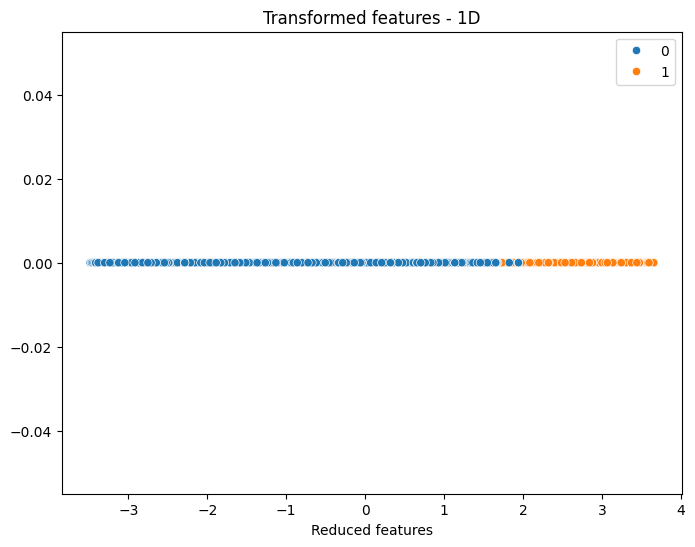

In [ ]:
tmp_df = pd.DataFrame(X_train_scaled, columns=['Reduced features'])
tmp_df['Attack_label'] = y_train_label_resampled

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tmp_df, x='Reduced features', y=np.zeros_like(tmp_df['Reduced features']), hue='Attack_label')

plt.legend(loc='upper right')
plt.title('Transformed features - 1D')
plt.show()

In [ ]:
# Base models

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
nb_model = GaussianNB()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier


In [ ]:
estimators = []
estimators.append(('AdaBoostClassifier', AdaBoostClassifier(random_state=13) ))
# estimators.append(('Bagging Classifier', BaggingClassifier(random_state=13) ))
# estimators.append(('Bernoulli NB', BernoulliNB() ))
estimators.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=13) ))
# estimators.append(('Dummy Classifier', DummyClassifier(random_state=13) ))
# estimators.append(('Extra Tree Classifier', ExtraTreeClassifier(random_state=13) ))
# estimators.append(('Extra Trees Classifier', ExtraTreesClassifier(random_state=13) ))
estimators.append(('Gaussian NB', GaussianNB() ))
# estimators.append(('Gaussian Process Classifier', GaussianProcessClassifier(random_state=13) ))
# estimators.append(('Gradient Boosting Classifier', GradientBoostingClassifier(random_state=13) ))
# estimators.append(('Hist Gradient Boosting Classifier', HistGradientBoostingClassifier(random_state=13) ))
estimators.append(('KNN', KNeighborsClassifier() ))
#estimators.append(('Label Propagation', LabelPropagation() ))
#estimators.append(('Label Spreading', LabelSpreading() ))
estimators.append(('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)))
# estimators.append(('Logistic Regression CV', LogisticRegressionCV(max_iter=1000, random_state=13) ))
# estimators.append(('MLPClassifier', MLPClassifier(max_iter=2000,random_state=13) ))
# estimators.append(('Nearest Centroid', NearestCentroid() ))
# estimators.append(('Passive Aggressive Classifier', PassiveAggressiveClassifier(random_state=13) ))
# estimators.append(('Perceptron', Perceptron(random_state=13) ))
#estimators.append(('RadiusNeighborsClassifier', RadiusNeighborsClassifier(radius=3) ))
estimators.append(('RandomForest', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13) ))
# estimators.append(('Ridge Classifier', RidgeClassifier(random_state=13) ))
# estimators.append(('Ridge Classifier CV', RidgeClassifierCV() ))
# estimators.append(('SGDClassifier', SGDClassifier(random_state=13) ))
estimators.append(('SVC', SVC(random_state=13)))
# estimators.append(('XGB', XGBClassifier(random_state=13) ))
# estimators.append(('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13) ))

In [ ]:
XGB = XGBClassifier(random_state=13)

In [ ]:
# from sklearn.ensemble import StackingClassifier
# SC = StackingClassifier(estimators=estimators,final_estimator=XGB,cv=6)
# SC.fit(X_train_scaled, y_train_label_resampled)
# y_pred = SC.predict(X_test_scaled)

# print(f"\nStacking classifier training Accuracy: {SC.score(X_train_scaled, y_train_label_resampled):0.2f}")
# print(f"Stacking classifier test Accuracy: {SC.score(X_test_scaled, y_test_label_resampled):0.2f}")

In [ ]:
# SC_Recall = recall_score(y_test_label_resampled, y_pred)
# SC_Precision = precision_score(y_test_label_resampled, y_pred)
# SC_f1 = f1_score(y_test_label_resampled, y_pred)
# SC_accuracy = accuracy_score(y_test_label_resampled, y_pred)
# SC_roc_auc = roc_auc_score(y_test_label_resampled, y_pred)

# cm = confusion_matrix(y_test_label_resampled, y_pred)
# print(cm)

In [ ]:
# numeric_cols = dataFrame.select_dtypes(include='number').columns
# X = dataFrame[numeric_cols].drop(['Attack_label'], axis=1)
# y_type = dataFrame['Attack_type']
# X_train, X_test, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2, random_state=42)

# # Label Encoding
# label_encoder = LabelEncoder()
# y_train_type =  label_encoder.fit_transform(y_train_type)
# y_test_type = label_encoder.transform(y_test_type)

# # Up-sampling minority classes while avoiding overfitting by generating new synthetic examples close to the minority class in feature space.
# smote = SMOTE(sampling_strategy='auto')
# X_train_resampled, y_train_type_resampled = X_train, y_train_type
# X_test_resampled, y_test_type_resampled = X_test, y_test_type

# # Feature Scaling
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_resampled)
# X_test_scaled = scaler.transform(X_test_resampled)

In [ ]:
X_train, X_test, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2, random_state=42)

# Label Encoding
label_encoder = LabelEncoder()
y_train_type =  label_encoder.fit_transform(y_train_type)
y_test_type = label_encoder.transform(y_test_type)

# Up-sampling minority classes while avoiding overfitting by generating new synthetic examples close to the minority class in feature space.
smote = SMOTE(sampling_strategy='auto')
X_train_resampled, y_train_type_resampled = smote.fit_resample(X_train, y_train_type)
X_test_resampled, y_test_type_resampled = smote.fit_resample(X_test, y_test_type)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_resampled)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score



# Define base models
base_models = [
    ('KNN', KNeighborsClassifier() ),
    ('dt', DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 2,random_state=13)),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 3, n_estimators= 170, random_state=13))
]

# Define the meta-model
meta_model =XGBClassifier(random_state=13)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True,  # Optional: include the original features in meta-model training
    cv=5  # Optional: use cross-validation for base models
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train_type)

# Make predictions on the test set
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test_type, y_pred)

print(f"Stacking Classifier Accuracy: {accuracy:.4f}")


Stacking Classifier Accuracy: 0.9284


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report


precision = precision_score(y_test_type, y_pred, average='weighted')
recall = recall_score(y_test_type, y_pred, average='weighted')
f1 = f1_score(y_test_type, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

conf_matrix = confusion_matrix(y_test_type, y_pred)
print(conf_matrix)

Precision: 0.9320
Recall: 0.9284
F1-Score: 0.9288
[[1831    2    0    0    0    0    0    0    0   25  111    0    0    0
     0]
 [   0 1962    0    0    0    0    0   10   34    0    0  108    5    3
    16]
 [   0    0 2904    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 1999    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 2978    0    0    0    0    0    0    0    0    0
     0]
 [   1    0    0    0    0  145    0    0    0   22   16    0    6    0
     0]
 [   0    0    0    0    0    0   71    0    0    0    2    0    0    0
     0]
 [   0    6    0    0    0    0    0 4725   34    6   12    0    3    1
    28]
 [   0  165    0    0    0    0    0   50 1556    1    2  109   15    7
    41]
 [   0    0    0    0    0    3    0    0    0 1972   85    0    0    0
     0]
 [   8    0    0    0    0    0    0    1    0  105 2046    0   19    0
     0]
 [   0  196    0    0    0    0    0    0   94    0    3 1721    8    

<Axes: >

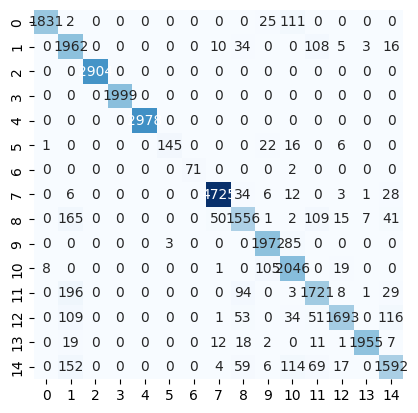

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)

In [ ]:
!pip install bayesian-optimization

In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:


# Function to return negative RMSE
def optimizationRF(n_estimators, max_depth, min_samples_split, max_features):
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                  max_depth=int(max_depth),
                                  min_samples_split=int(min_samples_split),
                                  max_features=min(max_features, 0.999),
                                  random_state=42)

    return -1.0 * cross_val_score(model, X_train_scaled, y_train_type_resampled, cv=3, scoring="neg_mean_squared_error").mean()

# Hyperparameters to optimise
param_boundsRF = {
    'n_estimators': (10, 170),
    'max_depth': (10,20),
    'min_samples_split': (2,10),
    'max_features': (0.1, 0.999),
}

optimizerRF = BayesianOptimization(f=optimizationRF, pbounds=param_boundsRF, random_state=42)
optimizerRF.maximize(init_points=5, n_iter=10)

# Best hyperparameters
best_params = optimizerRF.max['params']
print("Best Parameters for RF:", best_params)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 10.96     | 13.75     | 0.9547    | 7.856     | 105.8     |
| 2         | 9.324     | 11.56     | 0.2402    | 2.465     | 148.6     |
| 3         | 7.748     | 16.01     | 0.7366    | 2.165     | 165.2     |
| 4         | 6.796     | 18.32     | 0.2909    | 3.455     | 39.34     |
| 5         | 8.228     | 13.04     | 0.5718    | 5.456     | 56.6      |
| 6         | 9.214     | 11.56     | 0.3423    | 2.799     | 148.4     |
| 7         | 7.891     | 15.74     | 0.2131    | 4.796     | 101.7     |
| 8         | 10.99     | 12.82     | 0.999     | 9.275     | 107.7     |
| 9         | 13.88     | 14.83     | 0.999     | 5.957     | 110.1     |
| 10        | 14.09     | 15.83     | 0.999     | 4.189     | 113.6     |
| 11        | 11.38     | 10.45     | 0.999     | 2.0       | 112.5     |
| 12        | 7.938     | 20.0      | 

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Dummy data
# X_train_scaled and y_train_type_resampled should be defined based on your actual dataset

# Define the categorical maps
max_features_map = {0: 'auto', 1: 'sqrt', 2: 'log2'}
splitter_map = {0: 'best', 1: 'random'}
criterion_map = {0: 'gini', 1: 'entropy'}

def optimizationDT(max_features, max_depth, splitter, criterion, min_samples_split):
    # Map integers back to categorical values
    max_features_val = max_features_map[int(round(max_features))]
    splitter_val = splitter_map[int(round(splitter))]
    criterion_val = criterion_map[int(round(criterion))]

    # Create the model
    model = DecisionTreeClassifier(
        max_features=max_features_val,
        max_depth=int(max_depth),
        splitter=splitter_val,
        criterion=criterion_val,
        min_samples_split=int(min_samples_split),
        random_state=42
    )

    # Perform cross-validation
    return -1.0 * cross_val_score(model, X_train_scaled, y_train_type_resampled, cv=3, scoring="neg_mean_squared_error").mean()

# Define the parameter bounds (all numerical)
param_bounds = {
    'max_features': (0, 2),       # Mapping to indices of max_features_map
    'max_depth': (1, 20),
    'splitter': (0, 1),           # Mapping to indices of splitter_map
    'criterion': (0, 1),          # Mapping to indices of criterion_map
    'min_samples_split': (2, 4)
}

# Initialize the optimizer
optimizerDT = BayesianOptimization(
    f=optimizationDT,
    pbounds=param_bounds,
    random_state=42
)

# Run optimization
optimizerDT.maximize(init_points=5, n_iter=10)

# Best hyperparameters
best_params_raw = optimizerDT.max['params']
best_params = {
    'max_features': max_features_map[int(round(best_params_raw['max_features']))],
    'max_depth': int(best_params_raw['max_depth']),
    'splitter': splitter_map[int(round(best_params_raw['splitter']))],
    'criterion': criterion_map[int(round(best_params_raw['criterion']))],
    'min_samples_split': int(best_params_raw['min_samples_split'])
}
print("Best Parameters for DT:", best_params)


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming X_train_scaled and y_train_type_resampled are already defined

# Define the categorical maps
algorithm_map = {0: 'auto', 1: 'ball_tree', 2: 'kd_tree', 3: 'brute'}

def optimizationKNN(n_neighbors, algorithm):
    # Map the algorithm index back to its name
    algorithm_val = algorithm_map[int(round(algorithm))]

    # Create the model
    model = KNeighborsClassifier(
        n_neighbors=int(n_neighbors),
        algorithm=algorithm_val
    )

    # Perform cross-validation
    return -1.0 * cross_val_score(model, X_train_scaled, y_train_type_resampled, cv=3, scoring="neg_mean_squared_error").mean()

# Define the parameter bounds (all numerical)
param_bounds_knn = {
    'n_neighbors': (1, 6),        # Range for neighbors
    'algorithm': (0, 3)           # Mapping to indices of algorithm_map
}

# Initialize the optimizer
optimizerKNN = BayesianOptimization(
    f=optimizationKNN,
    pbounds=param_bounds_knn,
    random_state=42
)

# Run optimization
optimizerKNN.maximize(init_points=5, n_iter=10)

# Best hyperparameters
best_params_raw_knn = optimizerKNN.max['params']
best_params_knn = {
    'n_neighbors': int(best_params_raw_knn['n_neighbors']),
    'algorithm': algorithm_map[int(round(best_params_raw_knn['algorithm']))]
}

print("Best Parameters for KNN:", best_params_knn)


In [ ]:
# def optimizationKNN(n_neighbors, algorithm):
#     model = KNeighborsClassifier(n_neighbors=int(n_neighbors),
#                                   algorithm=algorithm,
#                                   random_state=42)

#     return -1.0 * cross_val_score(model, X_train_scaled, y_train_type_resampled, cv=3, scoring="neg_mean_squared_error").mean()


# param_dict_knn = {
#               "n_neighbors":range(1,7),
#                 "algorithm":['auto', 'ball_tree', 'kd_tree','brute']
#              }

# optimizerKNN = BayesianOptimization(f=optimizationKNN, pbounds=param_dict_knn, random_state=42)
# optimizerKNN.maximize(init_points=5, n_iter=10)


# # Best hyperparameters
# best_params = optimizerKNN.max['params']
# print("Best Parameters for KNN:", best_params)